In [1]:
pip install opendatasets

     ---------------------------------------- 59.0/59.0 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


You should consider upgrading via the 'c:\users\cahaya irham\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 78.2/78.2 KB 2.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=eb29647525b0299cad7826c160471e4c391bebb798ce345b62c4d52919762402
  Stored in directory: c:\users\cahaya irham\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [27]:
import opendatasets as od
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import shutil

In [3]:
od.download('https://www.kaggle.com/datasets/karandeep98/real-life-violence-and-nonviolence-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: cahayairham
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 662M/662M [05:13<00:00, 2.22MB/s]


In [6]:
rootdir = 'real-life-violence-and-nonviolence-data/violence_dataset'
classes = ['non_violence', 'violence']


for i in classes:

  os.makedirs(rootdir +'/train/' + i)

  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.25

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

In [26]:
def create_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
    
    return model


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(rootdir, 'train')
validation_dir = os.path.join(rootdir, 'test')

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  fill_mode='nearest')
test_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  fill_mode='nearest')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 8297 images belonging to 2 classes.
Found 2766 images belonging to 2 classes.


In [34]:
EPOCHS = 17

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=414,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=138,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/17
414/414 - 292s - loss: 0.6189 - accuracy: 0.6471 - val_loss: 0.6515 - val_accuracy: 0.6286 - 292s/epoch - 705ms/step
Epoch 2/17
414/414 - 329s - loss: 0.5578 - accuracy: 0.7040 - val_loss: 0.5112 - val_accuracy: 0.7540 - 329s/epoch - 795ms/step
Epoch 3/17
414/414 - 293s - loss: 0.5246 - accuracy: 0.7288 - val_loss: 0.4776 - val_accuracy: 0.7685 - 293s/epoch - 708ms/step
Epoch 4/17
414/414 - 324s - loss: 0.4905 - accuracy: 0.7460 - val_loss: 0.4445 - val_accuracy: 0.7757 - 324s/epoch - 782ms/step
Epoch 5/17
414/414 - 319s - loss: 0.4624 - accuracy: 0.7729 - val_loss: 0.5104 - val_accuracy: 0.7272 - 319s/epoch - 771ms/step
Epoch 6/17
414/414 - 296s - loss: 0.4395 - accuracy: 0.7859 - val_loss: 0.3922 - val_accuracy: 0.8112 - 296s/epoch - 715ms/step
Epoch 7/17
414/414 - 291s - loss: 0.4143 - accuracy: 0.8010 - val_loss: 0.3777 - val_accuracy: 0.8257 - 291s/epoch - 704ms/step
Epoch 8/17
414/414 - 302s - loss: 0.4046 - accuracy: 0.8081 - val_loss: 0.3854 - val_accuracy: 0.8174 - 

In [35]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

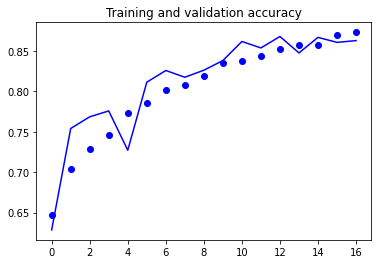

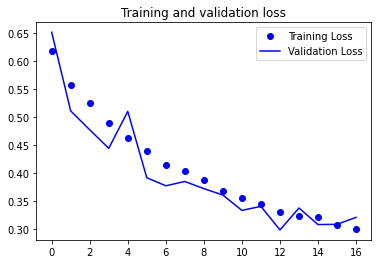

In [37]:
plot_loss_acc(history)

In [73]:
from keras.preprocessing import image

path = 'real-life-violence-and-nonviolence-data/foto-tangkapan-layar-72.jpg'

img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

np.shape(x)

(1, 150, 150, 3)

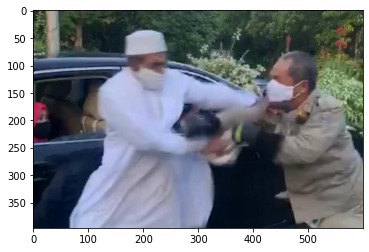

In [74]:
import matplotlib.image as mpimg
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

In [75]:
print(model.predict(x)[0,0])

0.69413984


In [76]:
if model.predict(x)[0,0] > 0.5:
    print('violence')
else:
    print('non violence')

violence
